# Predicting the charges of the medical insurance for a person based on various attributes of both categorical and numerical in nature

## Importing Libraries and Dataset 

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
# Importing the libraries of Keras and sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [3]:
# Setting the seed for the tensorflow

from tensorflow.python import set_random_seed
set_random_seed(2)

In [4]:
# Reading the dataset

df = pd.read_csv('insurance.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
# Details about the attributes including data type and non null count

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Converting the age attribute to float64 to make all the input features of the same datatype 

df['age'] = df['age'].astype('float64')

In [8]:
# Converting the children attribute to float64 to make all the input features of the same datatype 

df['children'] = df['children'].astype('float64')

In [9]:
# Attributes distribution in terms of mean, median and IQR

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
# Name of the columns of the df dataframe

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## One-hot Encoding/Dummy for the categorical values to convert them into numerical values as NN expects the input to be numerical

In [12]:
# Creating dummy variables for each of the categorical input variables

df_2 = pd.get_dummies(df, columns = ['sex','smoker','region'])

In [13]:
# Defining the order of the columns for easy input and target features bifurcation

cols = ['age','children','bmi','sex_female','sex_male','smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest','charges']

In [14]:
df_2 = df_2[cols]

In [15]:
df_2

,age,children,bmi,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19.0,0.0,27.900,1,0,0,1,0,0,0,1,16884.92400
1,18.0,1.0,33.770,0,1,1,0,0,0,1,0,1725.55230
2,28.0,3.0,33.000,0,1,1,0,0,0,1,0,4449.46200
3,33.0,0.0,22.705,0,1,1,0,0,1,0,0,21984.47061
4,32.0,0.0,28.880,0,1,1,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,3.0,30.970,0,1,1,0,0,1,0,0,10600.54830
1334,18.0,0.0,31.920,1,0,1,0,1,0,0,0,2205.98080
1335,18.0,0.0,36.850,1,0,1,0,0,0,1,0,1629.83350
1336,21.0,0.0,25.800,1,0,1,0,0,0,0,1,2007.94500


## Input and Output Features Pre-Processing including Normalizing and Train and Validation split

In [16]:
# # Defining the Input features

X = df_2.iloc[:,:-1]

In [17]:
X

,age,children,bmi,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0.0,27.900,1,0,0,1,0,0,0,1
1,18.0,1.0,33.770,0,1,1,0,0,0,1,0
2,28.0,3.0,33.000,0,1,1,0,0,0,1,0
3,33.0,0.0,22.705,0,1,1,0,0,1,0,0
4,32.0,0.0,28.880,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,3.0,30.970,0,1,1,0,0,1,0,0
1334,18.0,0.0,31.920,1,0,1,0,1,0,0,0
1335,18.0,0.0,36.850,1,0,1,0,0,0,1,0
1336,21.0,0.0,25.800,1,0,1,0,0,0,0,1


In [18]:
# Defining the target feature

y = df_2[['charges']]

In [19]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [20]:
# Defining the MinMaxScaler for normalizing the input and output features

minmax = MinMaxScaler()

In [21]:
# Normalizing the input features 

X = minmax.fit_transform(X)

In [22]:
# Normalizing the target feature

y = minmax.fit_transform(y)

In [23]:
# Splitting the data into 80:20 ratio with 80% as training data and 20% as validation data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Shape of the Input and Output Train and Validation data

print('Shape of Input Train data:',X_train.shape)
print('Shape of Output Train data:',y_train.shape)
print('Shape of Input Validation data:',X_val.shape)
print('Shape of Output Validation data:',y_val.shape)

Shape of Input Train data: (1070, 11)
Shape of Output Train data: (1070, 1)
Shape of Input Validation data: (268, 11)
Shape of Output Validation data: (268, 1)


## Increasing the number of hidden layers keeping the number of weights in the hidden layers constant here 2d d=11

In [25]:
# Creating a Keras Neural Networks Model with Input dimension as 11 and 1 Hidden layer with sigmoid activation function and 1 output layer

model = Sequential()
model.add(Dense(22, input_dim=X.shape[1], kernel_initializer='normal',use_bias=True, activation='sigmoid')) # 22 nodes in 1 hidden layer
model.add(Dense(1,))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 22)                264       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 23        
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Creating a Keras Neural Networks Model with Input dimension as 11 and 2 Hidden layers with sigmoid activation function and 1 output layer

model_layer_1 = Sequential()
model_layer_1.add(Dense(22, input_dim=X.shape[1], kernel_initializer='normal',use_bias=True, activation='sigmoid')) # 22 nodes in 1st hidden layer
model_layer_1.add(Dense(22, activation='sigmoid',use_bias=True)) # 22 nodes in the 2nd hidden layer
model_layer_1.add(Dense(1,))
model_layer_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 22)                264       
_________________________________________________________________
dense_3 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 23        
Total params: 793
Trainable params: 793
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Creating a Keras Neural Networks Model with Input dimension as 11 and 3 Hidden layers with sigmoid activation function and 1 output layer

model_layer_2 = Sequential()
model_layer_2.add(Dense(22, input_dim=X.shape[1], kernel_initializer='normal',use_bias=True, activation='sigmoid')) # 22 nodes in 1st hidden layer
model_layer_2.add(Dense(22, activation='sigmoid',use_bias=True)) # 22 nodes in 2nd hidden layer
model_layer_2.add(Dense(22, activation='sigmoid',use_bias=True)) # 22 nodes in 3rd hidden layer
model_layer_2.add(Dense(1,))
model_layer_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 22)                264       
_________________________________________________________________
dense_6 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_7 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 23        
Total params: 1,299
Trainable params: 1,299
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Defining the loss function and Metrics to be used for evaluation as MSE and Optimizer as Adam for model with 1 hidden layer

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [29]:
# Defining the loss function and Metrics to be used for evaluation as MSE and Optimizer as Adam for model with 2 hidden layers

model_layer_1.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [30]:
# Defining the loss function and Metrics to be used for evaluation as MSE and Optimizer as Adam for model with 3 hidden layers

model_layer_2.compile(loss='mse', optimizer='adam', metrics=['mse'])

## Training the 3 models with different number of hidden layers 

In [31]:
# Training the NN model with scaled Input and Output with 100 Epochs and batch_size of 50 to see the MSE at each epoch 
# for training and validation split of the data for model with 1 hidden layer

history = model.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
22/22 [==============================] - 0s 19ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 8/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0116 - 

In [32]:
# Training the NN model with scaled Input and Output with 100 Epochs and batch_size of 50 to see the MSE at each epoch 
# for training and validation split of the data for model with 2 hidden layers

history_layer_1 = model_layer_1.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
22/22 [==============================] - 0s 12ms/step - loss: 0.1057 - mse: 0.1057 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0281 - 

In [33]:
# Training the NN model with scaled Input and Output with 100 Epochs and batch_size of 50 to see the MSE at each epoch 
# for training and validation split of the data for model with 3 hidden layers

history_layer_2 = model_layer_2.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
22/22 [==============================] - 0s 12ms/step - loss: 0.1928 - mse: 0.1928 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0412 - mse: 0.0412 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0363 - mse: 0.0363 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0355 - 

In [34]:
# Calculating the product of number of weights, number of epochs and number of data points in each batch=50
# for using it as Computational Cost for model with 1 hidden layer

epoch_x_mul_1 = []
for i in range (1,(len(history.epoch)+1)):
    epoch_x_mul_1.append(i * model.count_params() * 50)

In [35]:
# Calculating the product of number of weights, number of epochs and number of data points in each batch=50
# for using it as Computational Cost for model with 2 hidden layers

epoch_x_mul_2 = []
for i in range (1,(len(history_layer_1.epoch)+1)):
    epoch_x_mul_2.append(i * model_layer_1.count_params() * 50)

In [36]:
# Calculating the product of number of weights, number of epochs and number of data points in each batch=50
# for using it as Computational Cost for model with 3 hidden layers

epoch_x_mul_3 = []
for i in range (1,(len(history_layer_2.epoch)+1)):
    epoch_x_mul_3.append(i * model_layer_2.count_params() * 50)

In [37]:
# Validation mse for model with 1 hidden layer assigned to a variable

MSE_y_val = history.history['val_mse']

In [38]:
# Validation mse for model with 2 hidden layers assigned to a variable

MSE_y_val_layer = history_layer_1.history['val_mse']

In [39]:
# Validation mse for model with 3 hidden layers assigned to a variable

MSE_y_val_layer_2 = history_layer_2.history['val_mse']

## Best Results Graph showing Best Validation MSE(lowest) obtained for model with 3 hidden layers and 22 nodes in each of the 3 hidden layers. This is the best model with the best performance in terms of MSE for Validation dataset which is very very slight improved from the model with 1 hidden layer and 2 hidden layers 

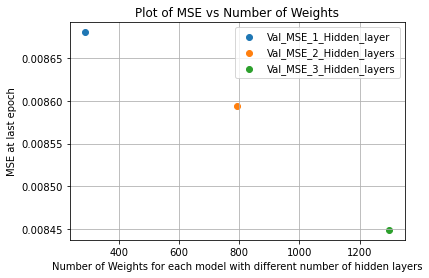

In [40]:
# Plotting Validation MSE for all the 3 models on y axis with different number of hidden layers with their corresponding number of weights on x axis
# Validation MSE of last epoch for each of the 3 models on y axis with their corresponding number of weights on x axis

from matplotlib import pyplot as plt
plt.scatter(model.count_params(),MSE_y_val[-1], label = 'Val_MSE_1_Hidden_layer')
plt.scatter(model_layer_1.count_params(),MSE_y_val_layer[-1], label = 'Val_MSE_2_Hidden_layers')
plt.scatter(model_layer_2.count_params(),MSE_y_val_layer_2[-1],label = 'Val_MSE_3_Hidden_layers' )
plt.grid()
plt.ylabel('MSE at last epoch')
plt.xlabel('Number of Weights for each model with different number of hidden layers')
plt.title('Plot of MSE vs Number of Weights')
plt.legend()

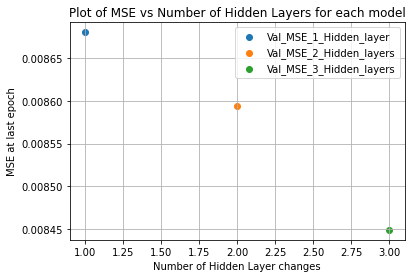

In [41]:
# Plotting the Validation MSE for all the 3 models on y axis having different number of hidden layers with number of hidden layers on x axis
# Validation MSE of last epoch for each of the 3 models on y axis with their corresponding number of hidden layers on x axis

from matplotlib import pyplot as plt
plt.scatter(len(model.layers) - 1,MSE_y_val[-1], label = 'Val_MSE_1_Hidden_layer')
plt.scatter(len(model_layer_1.layers) - 1, MSE_y_val_layer[-1], label = 'Val_MSE_2_Hidden_layers')
plt.scatter(len(model_layer_2.layers) - 1,MSE_y_val_layer_2[-1], label = 'Val_MSE_3_Hidden_layers' )
plt.grid()
plt.ylabel('MSE at last epoch')
plt.xlabel('Number of Hidden Layer changes')
plt.title('Plot of MSE vs Number of Hidden Layers for each model')
plt.legend()

## Computational Cost to achieve the best Validation is very high. To achieve almost the same Validation MSE not even 1% better it takes 3 times the computation cost than the basic model with 1 hidden layer. To spend 3 times more on Computation to achieve less than 1% better Validation MSE using the 3 hidden layers is not acceptable. So, increasing the number of hidden layers gives slight better performance but it doesn't help rather increases the computation cost by 3 fold

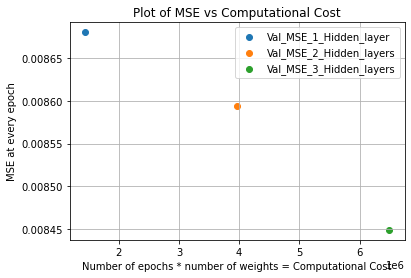

In [42]:
# Computational Cost calculated earlier for all the 3 models with different number of hidden layers on x axis and MSE of last epoch for that corresponding model on y axis
# Conmputational Cost for 3 different models on x axis vs MSE of last epoch for these 3 models on y axis

from matplotlib import pyplot as plt
plt.scatter(epoch_x_mul_1[-1],MSE_y_val[-1], label = 'Val_MSE_1_Hidden_layer')
plt.scatter(epoch_x_mul_2[-1],MSE_y_val_layer[-1], label = 'Val_MSE_2_Hidden_layers')
plt.scatter(epoch_x_mul_3[-1],MSE_y_val_layer_2[-1],label = 'Val_MSE_3_Hidden_layers' )
plt.grid()
plt.ylabel('MSE at every epoch')
plt.xlabel('Number of epochs * number of weights = Computational Cost')
plt.title('Plot of MSE vs Computational Cost')
plt.legend()

## Increasing the number of nodes/neurons while keeping the number of hidden layers constant

In [43]:
# Creating a Keras Neural Networks Model with Input dimension as 11, 44 nodes in each of the 2 hidden layers, 
# 2 Hidden layers with sigmoid activation function and 1 output layer

model_weight_1 = Sequential()
model_weight_1.add(Dense(44, input_dim=X.shape[1], kernel_initializer='normal',use_bias=True, activation='sigmoid')) # 44 nodes in the 1st hidden layer
model_weight_1.add(Dense(44, activation='sigmoid',use_bias=True)) # 44 nodes in the 2nd hidden layer
model_weight_1.add(Dense(1, ))
model_weight_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 44)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 44)                1980      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 45        
Total params: 2,553
Trainable params: 2,553
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Creating a Keras Neural Networks Model with Input dimension as 11, 66 nodes in each of the 2 hidden layers, 
# 2 Hidden layers with sigmoid activation function and 1 output layer

model_weight_2 = Sequential()
model_weight_2.add(Dense(66, input_dim=X.shape[1], kernel_initializer='normal',use_bias=True, activation='sigmoid')) # 66 nodes in the 1st hidden layer
model_weight_2.add(Dense(66, activation='sigmoid',use_bias=True)) # 66 nodes in the 2nd hidden layer
model_weight_2.add(Dense(1, ))
model_weight_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 66)                792       
_________________________________________________________________
dense_13 (Dense)             (None, 66)                4422      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 67        
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Defining the loss function and Metrics to be used for evaluation as MSE and Optimizer as Adam for model with 44 nodes in each of the 2 hidden layers

model_weight_1.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [46]:
# Defining the loss function and Metrics to be used for evaluation as MSE and Optimizer as Adam for model with 66 nodes in each of the 2 hidden layers

model_weight_2.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [47]:
# Training the NN model with scaled Input and Output with 100 Epochs and batch_size of 50 to see the MSE at each epoch 
# for training and validation split of the data for model 44 nodes in each of the 2 hidden layers

history_weight_1 = model_weight_1.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
22/22 [==============================] - 0s 12ms/step - loss: 0.0435 - mse: 0.0435 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0174 - 

In [48]:
# Training the NN model with scaled Input and Output with 100 Epochs and batch_size of 50 to see the MSE at each epoch 
# for training and validation split of the data for model 66 nodes in each of the 2 hidden layers

history_weight_2 = model_weight_2.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0332 - mse: 0.0332 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0288 - val_mse: 0.0288
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0126 - 

In [49]:
# Validation mse for model with 44 nodes in each of the 2 hidden layers assigned to a variable

MSE_y_weight_1_val = history_weight_1.history['val_mse']

In [50]:
# Validation mse for model with 66 nodes in each of the 2 hidden layers assigned to a variable

MSE_y_weight_2_val = history_weight_2.history['val_mse']

In [51]:
# Calculating the product of number of weights, number of epochs and number of data points in each batch=50
# for using it as Computational Cost for model with 44 nodes in each of the 2 hidden layers

epoch_x_mul_4 = []
for i in range (1,(len(history_weight_1.epoch)+1)):
    epoch_x_mul_4.append(i * model_weight_1.count_params() * 50 )

In [52]:
# Calculating the product of number of weights, number of epochs and number of data points in each batch=50
# for using it as Computational Cost for model with 66 nodes in each of the 2 hidden layers

epoch_x_mul_5 = []
for i in range (1,(len(history_weight_2.epoch)+1)):
    epoch_x_mul_5.append(i * model_weight_2.count_params() * 50 )

## Validation MSE does not improve by increasing the number of the weights in the hidden layers as the MSE is slightly worse than what it is with the basic model consisting 22 nodes rather 44 or 66 nodes. This is the best model with 22 nodes in each of the 2 hidden layers giving the best results after computing large number of weights and the MSE's. So, increasing the number of the weights does not help in this case.

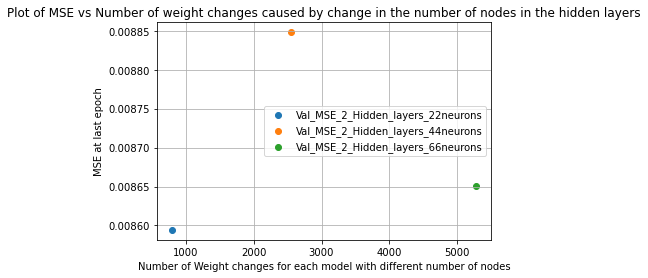

In [53]:
# MSE for each of the 3 models with 2 hidden layers and 22, 44 and 66 nodes varied in the hidden layers on y axis and 
# number of weights for these 3 models with different nodes in each of the 2 hidden layers

from matplotlib import pyplot as plt
plt.scatter(model_layer_1.count_params(),MSE_y_val_layer[-1], label = 'Val_MSE_2_Hidden_layers_22neurons')
plt.scatter(model_weight_1.count_params(),MSE_y_weight_1_val[-1],label = 'Val_MSE_2_Hidden_layers_44neurons' )
plt.scatter(model_weight_2.count_params(),MSE_y_weight_2_val[-1],label = 'Val_MSE_2_Hidden_layers_66neurons' )
plt.grid()
plt.ylabel('MSE at last epoch')
plt.xlabel('Number of Weight changes for each model with different number of nodes')
plt.title('Plot of MSE vs Number of weight changes caused by change in the number of nodes in the hidden layers')
plt.legend()

## At the very first place the Validation MSE is not improved by increasing the number of the weights in the hidden layers. Now, considering the computational cost one would incur to achieve the this low Validation MSE of below 0.01 is 3 to 5 times more than the basic model. To spend 3 to 5 times more on the computation cost and not get any improvement in terms of the MSE for the Regression problem doesn't make sense to increase the number of nodes/weights keeping the number of the hidden layers constant.

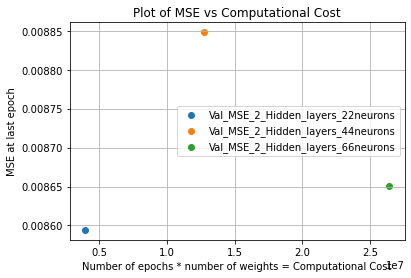

In [54]:
# # Computational Cost calculated earlier for all the 3 models with different number of nodes in each of the 2 hidden layers on x axis 
# and MSE of last epoch for that corresponding model on y axis 
# Conmputational Cost for 3 different models on x axis vs MSE of last epoch for these 3 models on y axis with different number of nodes in each of the hidden layers

from matplotlib import pyplot as plt
plt.scatter(epoch_x_mul_2[-1],MSE_y_val_layer[-1], label = 'Val_MSE_2_Hidden_layers_22neurons')
plt.scatter(epoch_x_mul_4[-1],MSE_y_weight_1_val[-1],label = 'Val_MSE_2_Hidden_layers_44neurons' )
plt.scatter(epoch_x_mul_5[-1],MSE_y_weight_2_val[-1],label = 'Val_MSE_2_Hidden_layers_66neurons' )
plt.grid()
plt.ylabel('MSE at last epoch')
plt.xlabel('Number of epochs * number of weights = Computational Cost')
plt.title('Plot of MSE vs Computational Cost')
plt.legend()

# Conclusion

## 1. Increasing the number of the layers: Keeping the number of the weights constant in the hidden layers and increasing the number of the hidden layers from 1 to 3 in a step of 1, gave results which indicated there was a very slight improvement in the Validation MSE if the number of the hidden layers were increased but this slight increase in the MSE performance had a very huge implication of Computation Cost increasing drastically by 3 times making it not advisable to increase the increase the number of the hidden layers as it doesn't help. There is no point in spending 3 times more on the computational cost which not even getting 1% more improvement on the Validation MSE. The Best results obtained were Validation MSE of 0.0084 for the model with 3 hidden layers, MSE of 0.0086 for 2 hidden layers network and MSE of 0.0087 for network with single hidden layer keeping the number of nodes same as 22. The Validation MSE reduces at a faster rate for the model with 1 hidden layer as compared to model with 2 or 3 hidden layers. The loss is reducing at a higher rate for the model with single hidden layer rather than models with higher number of hidden layers 2 or 3.

## 2. Increasing the number of the Weights/Nodes: Keeping the number of the hidden layers to be constant at 2 and increasing the number of the weights in ech of the hidden layers from 22 to 66 in steps of 22, showed that Validation MSE was almost the same for all the 3 cases but slightly better for model with 22 neurons. Increasing the number of the weights did not improve the Validation MSE. Now, coming to the Computational Cost it would incur to do this is huge. For 44 neurons network, the computional cost goes up by 3 times and for 66 neurons network, the computional cost goes up by 5 times as compared to the model with 22 neurons. So, on both the fronts of Validation MSE and Computational Cost increasing the number of the weights doesn't help in this case. The Best results obtained were Validation MSE of 0.0086 for the model with 22 nodes in each of the 2 hidden layers, MSE of 0.00885 for the model with 44 nodes in each of the 2 hidden layers and MSE of 0.00865 for network with 66 nodes in each of the 2 hidden layers. The MSE is slightly increasing when increasing (becoming worse) the number of weights. The MSE is almost the same but the computational cost is huge.

## For other cases or problems, this may change due to the nature of the problem which may be different due to the different attributes of the data and can also be due to the size and type of the dataset.